In [4]:
import pandas as pd
furniture=pd.read_csv("C:\\Users\hp\Downloads\\Super_Store.csv",engine='python')

###### About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [3]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## Data Preprocessing

In [6]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [7]:
furniture['Order Date']=furniture['Order Date'].astype('datetime64[ns]')

In [8]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840


In [9]:
# Sort the Order Date 
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date    Sales
1577 2014-01-06  2573.82


Order Date    0
Sales         0
dtype: int64

In [10]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [11]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [12]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

## Data Visualization

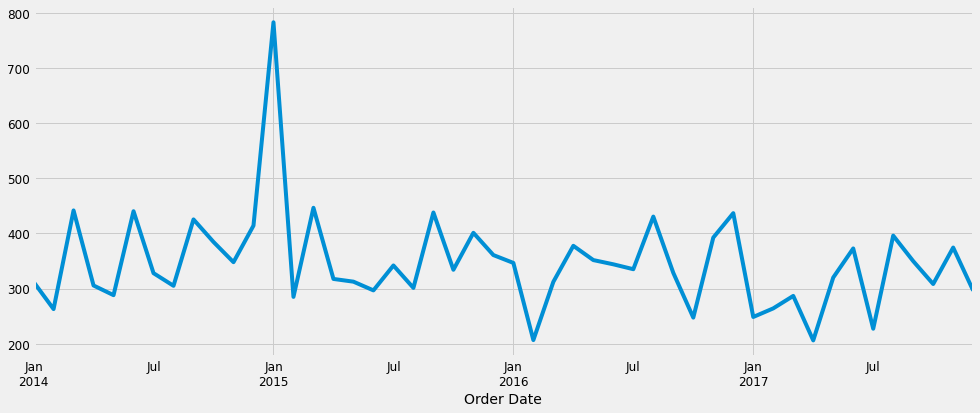

In [13]:
y.plot(figsize = (15, 6))
plt.show()

###### Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


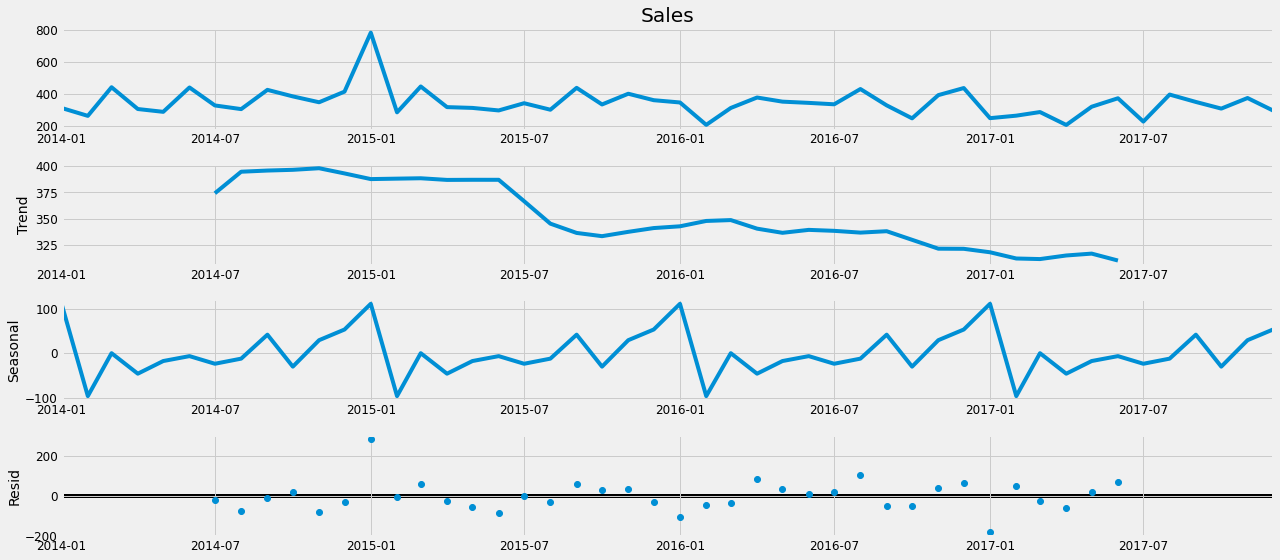

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

In [15]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:702.6705312928079


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:902.3109077957556
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:453.9753787450912
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:445.70342832929174
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:628.507349807925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:449.85654362896224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:447.665431724446
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:668.1480179335425


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2122.1122201385524
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:455.4607930439237
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:447.60523417329307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:623.164514287966


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2052.8179874112784
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:451.79486304204505
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:449.54564413999924
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:592.3531323021211


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:848.881560870706
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:454.5380266017248
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:455.1635648615939
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:591.0948004745918
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:455.8385868065363
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:455.79436565806697
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:563.6096340048559


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1678.0829543679072
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:447.26571671666653
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:438.08244546760903
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:565.2719903086607


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1567.2970721941406
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:442.60811321479497
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:440.05646017931286
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:607.1168883201808


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1188.0462561527934
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:455.43182639786914
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:447.6042832266725
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:604.0397441089417
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1962.1140463758172
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:451.79565395270873
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:449.54512219536656
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:580.1036310565468


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1893.918467049286
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:457.4173509572125
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:448.9413690239768
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:581.753568278562


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1711.1376237575828
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:453.41352686809546
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:450.9417113399139
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:578.2108885640934


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1017.504326416105
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:451.45645819605346
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:449.17184886737823
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:579.441930610236


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1446.0270868800742
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:451.4398834709538
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:450.62941579001733
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:565.4182808053866


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2011.6465663276097
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:448.7717552776411
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:440.0721800478702
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:567.1998849666113
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:444.60164310986715
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:442.03332186453963


###### Fitting the ARIMA model

In [17]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0160      0.261     -0.061      0.951      -0.527       0.496
ma.L1         -0.9941      2.605     -0.382      0.703      -6.099       4.111
ar.S.L12      -0.4843      0.079     -6.114      0.000      -0.640      -0.329
sigma2      1.252e+04   3.08e+04      0.406      0.685   -4.79e+04    7.29e+04


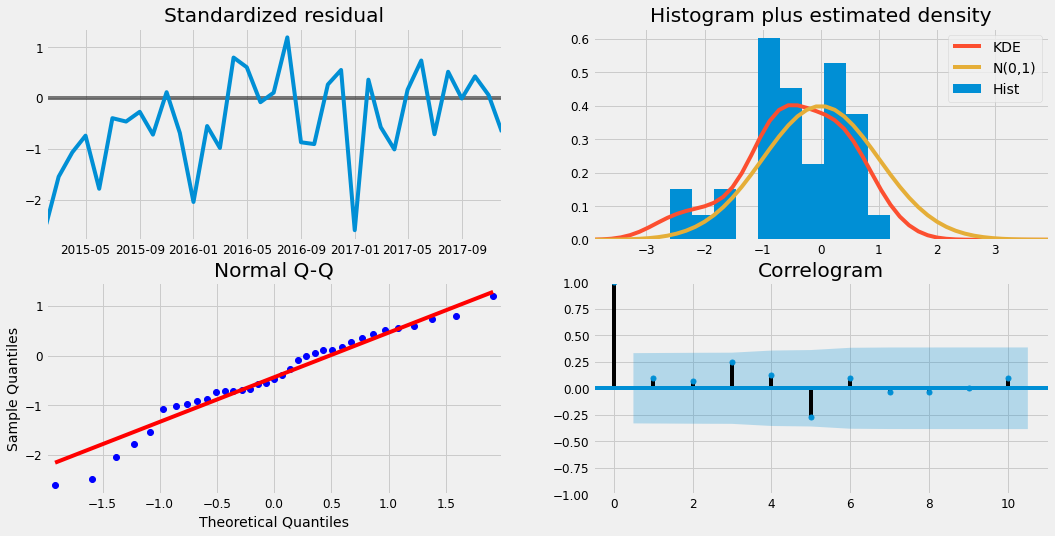

In [18]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

###### Validating Forecasts

In [19]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,322.332465,773.003176
2017-02-01,-2.228693,447.677987
2017-03-01,127.817663,577.043672
2017-04-01,97.627767,546.243568
2017-05-01,77.220336,525.286023
2017-06-01,64.685131,512.252370
2017-07-01,85.004090,532.117623
2017-08-01,113.766529,560.465360
2017-09-01,127.783000,574.101337


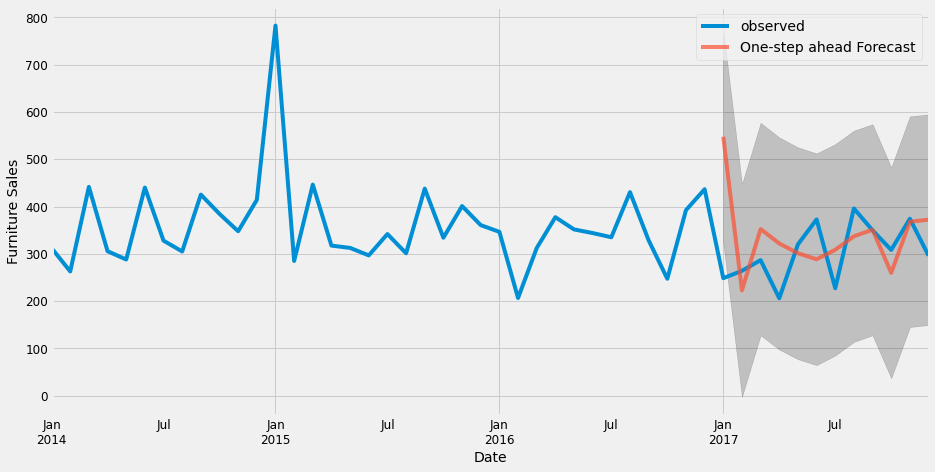

In [20]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

###### Error Analysis

In [21]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 11221.25
The Root Mean Squared Error of our forecasts is 105.93


##### Producing and visualizing forecasts

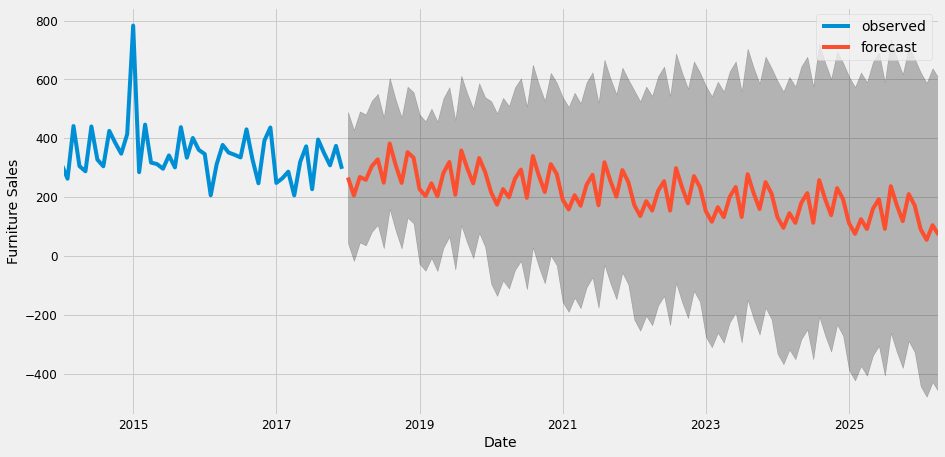

In [22]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Checking Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.962405
p-value: 0.000000
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


# KPSS Test

In [24]:
from statsmodels.tsa.stattools import kpss
from pandas import Series
result = kpss(y)
print('kpss Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

kpss Statistic: 0.274571
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# Decomposing

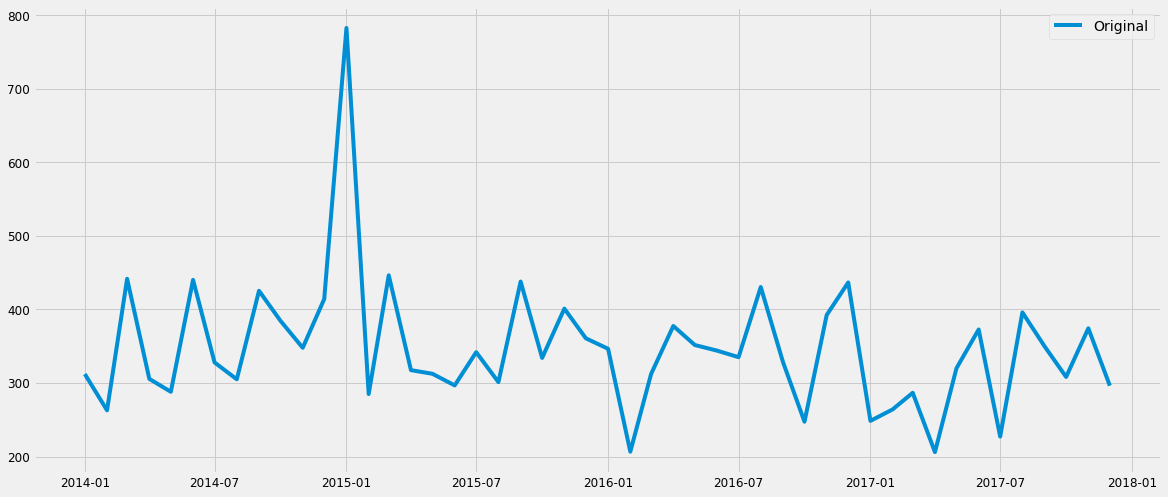

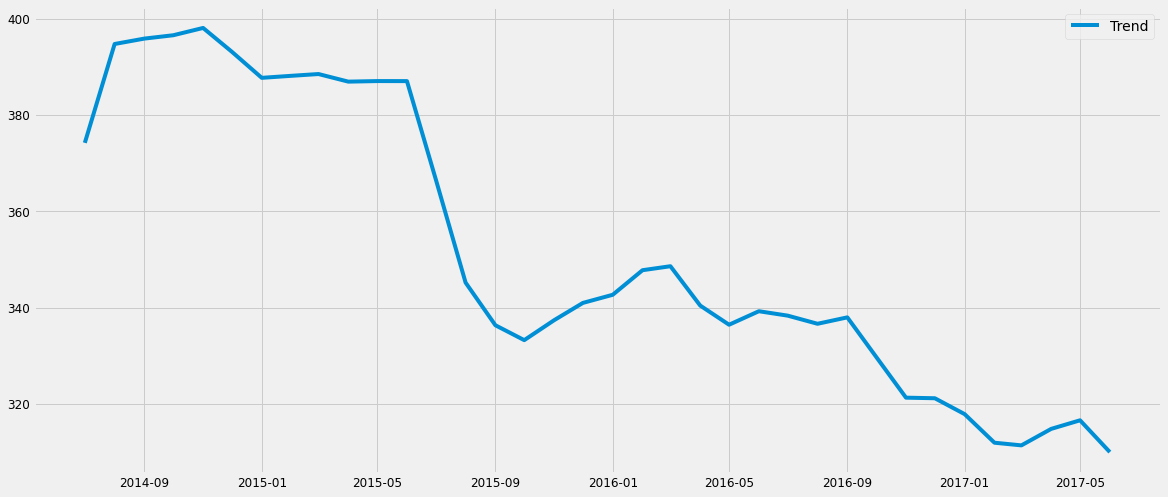

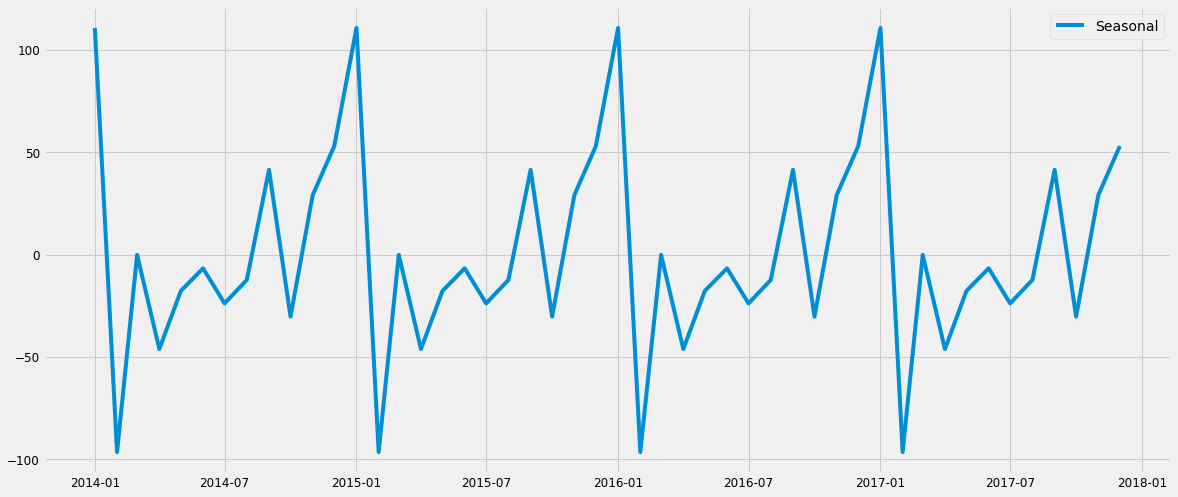

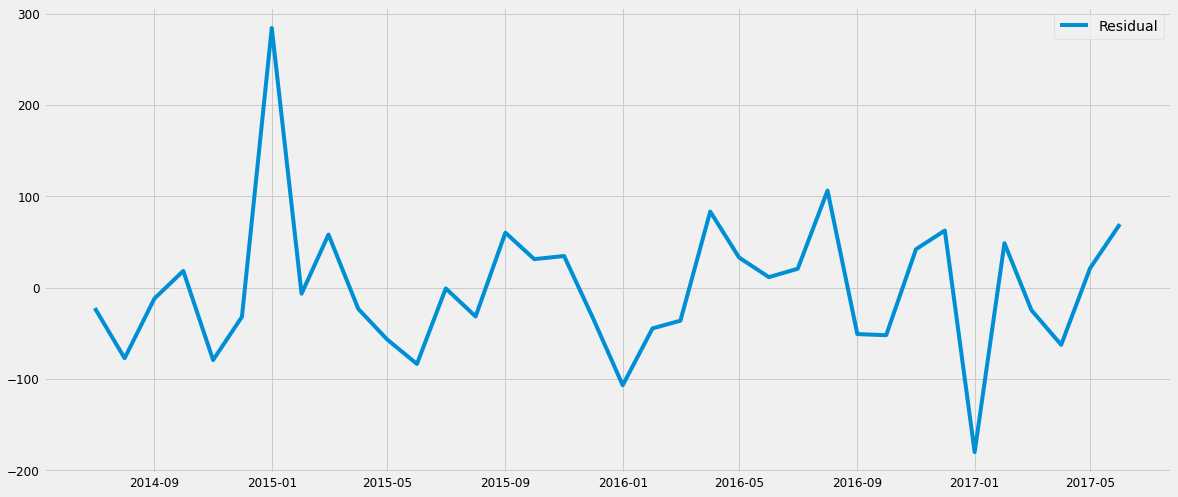

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')